<a href="https://colab.research.google.com/github/hoangnuthuphuong/Machine_Learning/blob/main/Chuong5_HuanLuyenMoHinh_%26_Loi/C5_BTKN04_2_kFoldCV_LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Quy trình xây dựng k-fold cross-validation**
Sau khi chia tập dữ liệu D ban đầu thành 2 tập train – test với tỉ lệ thông thường là 70% - 30%, quá trình huấn luyện diễn ra với tập $D_{train}$ được tiến hành bằng cách lấy ra từ $D_{train}$ một phần nhỏ dữ liệu làm tập dữ liệu kiểm thử cho bước huấn luyện thứ i – gọi là $D_{validation}$. Phần dữ
liệu còn lại đóng vai trò là tập dữ liệu huấn luyện. Quá trình này lặp lại nhiều lần cho đến khi mô hình huấn luyện đạt được yêu cầu. Tóm lại, quy trình thực hiện k-fold cross-validation (với k thông thường được chọn k = 10 – nên gọi là 10-fold cross-validation) được tóm tắt như sau:
- Bước 1: Đọc dữ liệu gốc D
- Bước 2: Điều chỉnh dữ liệu
- Bước 3: Chia train – test theo tỉ lệ (thông thường là 70% - 30%)
- Bước 4: Xác định k
- Bước 5: Thực hiện huấn luyên mô hình với k-fold cross validation
- Bước 6: Kiểm định mô hình với tập dữ liệu test

Minh họa quy trình này với 5-fold cross-validation theo ví dụ của [sklearn](https://scikit-learn.org/stable/modules/cross_validation.html)
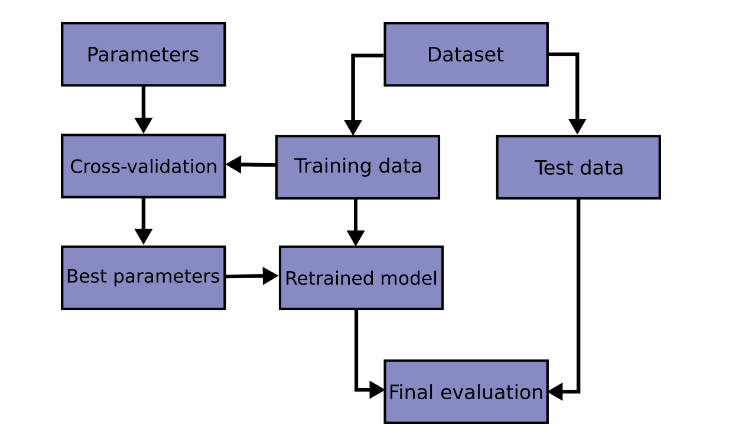

# **2. Huấn luyện mô hình hồi quy Logistic với 10-fold cv sử dụng sklearn**
Áp dụng **10-fold CV** trong quá trình huấn luyện mô hình phân lớp LogisticRegression sử dụng thư viện **sklearn**. Những kỹ thuật cơ bản sau cần được hoàn thiện:

##**Bài 1:**
- Đọc dữ liệu (ex2data2.txt);
- Chuẩn hóa dữ liệu (lưu ý: chỉ chuẩn
hóa X);
- Phân chia train – test theo tỉ lệ **70% -30%**;
- Xây dựng mô hình **hồi quy Logistic** sử dụng sklearn với thuật toán tối ưu là [liblinear](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html); số bước lăp là **1500**; thiết lập chế độ nhãn lớp là **auto**;
- Huấn luyện mô hình sử dụng  [cross_val_score()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) với lựa chọn k-
fold cv là 10, đánh giá mô hình bằng chỉ số [accuracy](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter) và áp dụng với tập
dữ liệu **(X_train, y_train**);
- In kết quả huấn luyện ra màn hình.

In [8]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

Đọc dữ liệu

In [9]:
def readData(folder, filename, delimiter= ","):
    D = np.loadtxt(os.path.join(folder, filename), delimiter=delimiter)
    X = D[:, :-1]
    y = D[:, -1]
    return X, y

Điều chỉnh dữ liệu

In [10]:
def featureScaling(X_train, X_test):
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    return X_train, X_test

Số lượng k-fold được xác định tùy thuộc vào số lượng y_train

In [18]:
def checkkFold(y_train):
    unique, counts = np.unique(y_train, return_counts=True)
    result = dict(zip(unique, counts))
    print("Số lượng k-fold được xác định")
    print(result)
    return result

**Huấn luyện mô hình cv = 10 và độ đo là scoring='accuracy'**

In [25]:
def crossValScore(model, X_train, y_train, cv=10, scoring='accuracy'):
    scores = cross_val_score(model, X_train, y_train, cv=10, scoring=scoring)
    print('\nKết quả huấn luyện 10-fold cv:')
    print(scores)
    return scores

In [26]:
def main():
    #Bước 1: Đọc dữ liệu
    X, y = readData('/content/drive/MyDrive/Classroom/Học máy 1 Phần cơ sở', 'ex2data2.txt')

    #Bước 2: Phân chia train - test theo tỉ lệ 70% - 30%
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=15)

    # Bước 3: Chuẩn hóa dữ liệu
    X_train, X_test = featureScaling(X_train, X_test)

    #Số lượng k-fold được xác định tùy thuộc vào số lượng y_train
    result = checkkFold(y_train)

    #Bước 4: Khởi tạo mô hình hồi quy logistic, với thuật toán tối ưu là liblinear
    #Bước lặp 1500; multi_class = 'auto' để tự phát hiện nhãn lớp nhị phân hay đa nhãn lớp
    classifier = LogisticRegression(solver='liblinear', max_iter=1500, multi_class='auto')

    #Bước 5: Huấn luyện mô hình cv = 10 và độ đo là scoring='accuracy' và in kết quả
    scores = crossValScore(classifier, X_train, y_train, cv=10, scoring='accuracy')


if __name__ == "__main__":
    main()

Số lượng k-fold được xác định
{0.0: 41, 1.0: 41}

Kết quả huấn luyện 10-fold cv:
[0.66666667 0.55555556 0.125      0.25       0.625      0.625
 0.5        0.5        0.75       0.75      ]


## **Bài 2:**
- Đọc dữ liệu (ex2data2.txt);
- Chuẩn hóa dữ liệu (lưu ý: chỉ chuẩn hóa X);
- Phân chia train – test theo tỉ lệ **90% - 10%**;
- Xây dựng mô hình hồi quy Logistic sử dụng sklearn với thuật toán tối ưu là [liblinear](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html); số bước lăp là **1500**;
thiết lập chế độ nhãn lớp là **auto**;
- Thiết lập **10-fold cv** bằng [ShuffleSplit](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter) với tùy chọn **n_splits = 10, test_size = 20%**;
- Huấn luyện mô hình sử dụng [cross_val_score()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)  với cv được dùng là ShuffleSplit nêu trên, đánh giá mô hình bằng chỉ số  [accuracy](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter) và áp dụng với tập dữ liệu (**X_train, y_train**);
- In kết quả huấn luyện ra màn hình.

In [27]:
import os
import numpy as np
from sklearn.model_selection import train_test_split, ShuffleSplit, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [28]:
def readData(folder, filename, delimiter= ","):
    D = np.loadtxt(os.path.join(folder, filename), delimiter=delimiter)
    X = D[:, :-1]
    y = D[:, -1]
    return X, y

In [29]:
def featureScaling(X_train, X_test):
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    return X_train, X_test

In [30]:
def checkkFold(y_train):
    unique, counts = np.unique(y_train, return_counts=True)
    result = dict(zip(unique, counts))
    print("Số lượng k-fold được xác định")
    print(result)
    return result

In [33]:
def crossValScore(model, X_train, y_train, cv=10, scoring='accuracy'):
    scores = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')
    print('\nKết quả huấn luyên 10-fold cv')
    print(scores)
    return scores

In [34]:
def main():
    #Bước 1: Đọc dữ liệu
    X, y = readData('/content/drive/MyDrive/Classroom/Học máy 1 Phần cơ sở', 'ex2data2.txt')

    #Bước 2: Phân chia train - test theo tỉ lệ 90% - 10%
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=15)

    # Bước 3: Chuẩn hóa dữ liệu
    X_train, X_test = featureScaling(X_train, X_test)

    #Số lượng k-fold được xác định tùy thuộc vào số lượng y_train
    result = checkkFold(y_train)

    #Bước 4: Khởi tạo mô hình hồi quy logistic, với thuật toán tối ưu là liblinear
    #Bước lặp 1500; multi_class = 'auto' để tự phát hiện nhãn lớp nhị phân hay đa nhãn lớp
    classifier = LogisticRegression(solver='liblinear', max_iter=1500, multi_class='auto')

    #Bước 5: Đặc tả 10-fold cv với k = 10, validation size = 20%
    cv = ShuffleSplit(n_splits=10, test_size=0.20, random_state=15)

    #Bước 6: Huấn luyện mô hình cv = 10 và độ đo là scoring='accuracy' và in kết quả
    scores = crossValScore(classifier, X_train, y_train, cv=10, scoring='accuracy')

if __name__ == "__main__":
    main()

Số lượng k-fold được xác định
{0.0: 54, 1.0: 52}

Kết quả huấn luyên 10-fold cv
[0.54545455 0.54545455 0.63636364 0.54545455 0.36363636 0.54545455
 0.5        0.3        0.8        0.6       ]


## **Bài 3:**
- Đọc dữ liệu (**ex2data2.txt**);
- Chuẩn hóa dữ liệu (lưu ý: chỉ chuẩn hóa X);
- Phân chia train – test theo tỉ lệ **70% - 30%**;
- Xây dựng mô hình **hồi quy Logistic** sử dụng sklearn với thuật toán tối ưu là liblinear; số bước lăp là **1500**; thiết lập chế độ nhãn lớp là **auto**;
- Huấn luyện mô hình **10-fold cv** với cross_val_predict() áp dụng với tập dữ liệu (**X_train, y_train**);
- In kết quả dự đoán (**y_hat**) ra màn hình.

In [35]:
import os
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [36]:
def readData(folder, filename, delimiter= ","):
    D = np.loadtxt(os.path.join(folder, filename), delimiter=delimiter)
    X = D[:, :-1]
    y = D[:, -1]
    return X, y

In [37]:
def featureScaling(X_train, X_test):
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    return X_train, X_test

In [38]:
def checkkFold(y_train):
    unique, counts = np.unique(y_train, return_counts=True)
    result = dict(zip(unique, counts))
    print("Số lượng k-fold được xác định")
    print(result)
    return result

In [43]:
def crossValPredict(model, X_train, y_train, cv=10):
    scores = cross_val_predict(model, X_train, y_train, cv=10)
    print('\nKết quả huấn luyên 10-fold cv:')
    print(scores)
    return scores

In [44]:
def main():
    #Bước 1: Đọc dữ liệu
    X, y = readData('/content/drive/MyDrive/Classroom/Học máy 1 Phần cơ sở', 'ex2data2.txt')

    #Bước 2: Phân chia train - test theo tỉ lệ 70% - 30%
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=15)

    # Bước 3: Chuẩn hóa dữ liệu
    X_train, X_test = featureScaling(X_train, X_test)
    #Số lượng k-fold được xác định tùy thuộc vào số lượng y_train
    result = checkkFold(y_train)

    #Bước 4: Khởi tạo mô hình hồi quy logistic, với thuật toán tối ưu là liblinear
    #Bước lặp 1500; multi_class = 'auto' để tự phát hiện nhãn lớp nhị phân hay đa nhãn lớp
    classifier = LogisticRegression(solver='liblinear', max_iter=1500, multi_class='auto')

    #Bước 5: Huấn luyện mô hình cv = 10 và độ đo là scoring='accuracy' và lấy kết quả dự đoán về
    scores = crossValPredict(classifier, X_train, y_train, cv=10)

if __name__ == "__main__":
    main()

Số lượng k-fold được xác định
{0.0: 41, 1.0: 41}

Kết quả huấn luyên 10-fold cv:
[0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1.
 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1.
 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1.
 1. 1. 0. 0. 0. 1. 1. 1. 0. 0.]


## **Bài 4:** 
Sử dụng [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) để tìm bộ tham số tối ưu cho mô hình. Với **hồi quy Logistic**, chúng ta tìm giá trị tối ưu cho tham
số **C** áp dụng trong quá trình điều tiết **(regularization)** tránh hiện tượng **overfitting**.
- Đọc dữ liệu **(ex2data2.txt)**;
- Chuẩn hóa dữ liệu (lưu ý: chỉ chuẩn hóa **X**);
- Phân chia train – test theo tỉ lệ **70% - 30%**;
- Xây dựng mô hình **hồi quy Logistic** sử dụng sklearn với thuật toán tối ưu là **liblinear**; số bước lăp là 1500; thiết lập chế độ nhãn lớp là auto;
- Tạo bộ tham số C có giá trị 1, 10, 20, 50;
- Tạo GridSearchCV với mô hình hồi quy Logistic, cv = 10 và bộ tham số ở trên;
- Áp dụng với (X_train, y_train)
- In ra màn hình giá trị C tối ưu (**best_params_**) của mô hình
GridSearchCV ở trên;
- Sử dụng mô hình GridSearchCV để dự đoán y_hat cho tập X_test
- Đánh giá hiệu năng của mô hình bằng accuracy_score đối với tập (**y_hat, y_test**).

In [45]:
import os
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [46]:
def readData(folder, filename, delimiter= ","):
    D = np.loadtxt(os.path.join(folder, filename), delimiter=delimiter)
    X = D[:, :-1]
    y = D[:, -1]
    return X, y

In [47]:
def featureScaling(X_train, X_test):
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    return X_train, X_test

In [54]:
def girdSeachCV(model, X_train, y_train, specified_parameters: list):
    parameters = {'C':[1, 10, 20, 50]}
    cv = GridSearchCV(model, parameters, cv=10)
    cv.fit(X_train, y_train)
    return cv

In [58]:
def main():
    #Bước 1: Đọc dữ liệu
    X, y = readData('/content/drive/MyDrive/Classroom/Học máy 1 Phần cơ sở', 'ex2data2.txt')
    print(X.shape[1])

    #Bước 2: Phân chia train - test theo tỉ lệ 70% - 30%
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=15)

    # Bước 3: Chuẩn hóa dữ liệu
    X_train, X_test = featureScaling(X_train, X_test)

    #Bước 4: Khởi tạo mô hình hồi quy logistic, với thuật toán tối ưu là liblinear
    #Bước lặp 1500; multi_class = 'auto' để tự phát hiện nhãn lớp nhị phân hay đa nhãn lớp
    model = LogisticRegression(solver='liblinear', max_iter=1500, multi_class='auto')

    #Bước 5: Đặc tả 10-fold cv với k = 10 và huấn luyện mô hình
    cv = girdSeachCV(model, X_train, y_train, specified_parameters = [1, 10, 20, 50])

    #Bước 7: Thông báo kết quả tối ưu
    print('Kết quả huấn luyên 10-fold cv tối ưu:')
    print('\t', cv.best_params_)

    #Bước 8: Tạo mô hình LogisticRegression với best param
    #model.set_params(**cv.best_params_)
    #model.fit(X_train, y_train)
    y_pred = cv.predict(X_test)

    #Bước 9 đánh giá hiệu năng mô hình
    print('\nHiệu năng mô hình accuracy: ', accuracy_score(y_pred, y_test))

if __name__ == "__main__":
    main()

2
Kết quả huấn luyên 10-fold cv tối ưu:
	 {'C': 1}

Hiệu năng mô hình accuracy:  0.5277777777777778


## **Bài 5:** 
Sử dụng [LogisticRegressionCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html) để đơn giản hóa quá trình huấn luyện mô hình với k-fold cross-validation.
- Đọc dữ liệu (ex2data2.txt);
- Chuẩn hóa dữ liệu (lưu ý: chỉ chuẩn hóa X);
- Phân chia train – test theo tỉ lệ 70% - 30%;
- Khởi tạo mô hình LogisticRegressionCV với tùy chọn
    > random_state = <số nguyên tùy ý bạn> 
    
    > cv=10

và áp dụng với tập(**X_train, y_train**);
- Sử dụng mô hình ở trên để dự đoán y_hat đối với tập **X_test**;
- Đánh giá hiệu năng của mô hình bằng [accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) đối với tập **(y_hat, y_test)**.

In [59]:
from sklearn.linear_model import LogisticRegressionCV
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [60]:
def readData(folder, filename, delimiter= ","):
    D = np.loadtxt(os.path.join(folder, filename), delimiter=delimiter)
    X = D[:, :-1]
    y = D[:, -1]
    return X, y

In [61]:
def featureScaling(X_train, X_test):
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    return X_train, X_test

In [67]:
def main():
    #Bước 1: Đọc dữ liệu
    X, y = readData('/content/drive/MyDrive/Classroom/Học máy 1 Phần cơ sở', 'ex2data2.txt')

    #Bước 2: Phân chia train - test theo tỉ lệ 70% - 30%
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=15)

    # Bước 3: Chuẩn hóa dữ liệu
    X_train, X_test = featureScaling(X_train, X_test)

    #Bước 4 Tạo mô hình và huấn luyện 10-foldCV
    model = LogisticRegressionCV(cv=10, random_state=10).fit(X_train, y_train)

    #Bước 5: Dự đoán và đánh giá hiệu năng
    y_pred = model.predict(X_test)

    #Bước 6 Đánh giá hiệu năng mô hình
    print('\nHiệu năng mô hình accuracy: ', accuracy_score(y_pred, y_test))

if __name__ == "__main__":
    main()


Hiệu năng mô hình accuracy:  0.5


# **Câu hỏi mở rộng**



### **1.** Mở rộng **Bài 1**, hãy thay thế thuật toán tối ưu khác cho mô hình LogisticRegression. Tham khảo tại phần [tham số solver](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

Đọc dữ liệu

In [69]:
def readData(folder, filename, delimiter= ","):
    D = np.loadtxt(os.path.join(folder, filename), delimiter=delimiter)
    X = D[:, :-1]
    y = D[:, -1]
    return X, y

Điều chỉnh dữ liệu

In [70]:
def featureScaling(X_train, X_test):
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    return X_train, X_test

Số lượng k-fold được xác định tùy thuộc vào số lượng y_train

In [71]:
def checkkFold(y_train):
    unique, counts = np.unique(y_train, return_counts=True)
    result = dict(zip(unique, counts))
    print("Số lượng k-fold được xác định")
    print(result)
    return result

Huấn luyện mô hình cv = 10 và độ đo là scoring='accuracy'

In [72]:
def crossValScore(model, X_train, y_train, cv=10, scoring='accuracy'):
    scores = cross_val_score(model, X_train, y_train, cv=10, scoring=scoring)
    print('\nKết quả huấn luyện 10-fold cv:')
    print(scores)
    return scores

In [82]:
def main():
    #Bước 1: Đọc dữ liệu
    X, y = readData('/content/drive/MyDrive/Classroom/Học máy 1 Phần cơ sở', 'ex2data2.txt')

    #Bước 2: Phân chia train - test theo tỉ lệ 70% - 30%
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=15)

    # Bước 3: Chuẩn hóa dữ liệu
    X_train, X_test = featureScaling(X_train, X_test)

    #Số lượng k-fold được xác định tùy thuộc vào số lượng y_train
    result = checkkFold(y_train)

    #Bước 4: Khởi tạo mô hình hồi quy logistic
    #Bước lặp 1500; multi_class = 'auto' để tự phát hiện nhãn lớp nhị phân hay đa nhãn lớp


    ### CÁC THUẬT TOÁN TỐI ƯU KHÁC NGOÀI libinear: 'newton-cg', 'lbfgs', 'sag', 'saga'
    classifier = LogisticRegression(solver='newton-cg', max_iter=1500, multi_class='auto')

    #Bước 5: Huấn luyện mô hình cv = 10 và độ đo là scoring='accuracy' và in kết quả
    scores = crossValScore(classifier, X_train, y_train, cv=10, scoring='accuracy')

if __name__ == "__main__":
    main()

Số lượng k-fold được xác định
{0.0: 41, 1.0: 41}

Kết quả huấn luyện 10-fold cv:
[0.66666667 0.55555556 0.125      0.25       0.625      0.625
 0.5        0.5        0.75       0.75      ]


### **2.** Mở rộng **Bài 1**, hãy thay thế chỉ số đánh giá hiệu năng mô hình. Tham khảo [tại đây](https://scikit-learn.org/stable/modules/model_evaluation.html).

In [ ]:
from sklearn.metrics import hamming_loss, accuracy_score
import os
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [ ]:
def readData(folder, filename, delimiter= ","):
    D = np.loadtxt(os.path.join(folder, filename), delimiter=delimiter)
    X = D[:, :-1]
    y = D[:, -1]
    return X, y

In [ ]:
def featureScaling(X_train, X_test):
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    return X_train, X_test

In [ ]:
def checkkFold(y_train):
    unique, counts = np.unique(y_train, return_counts=True)
    result = dict(zip(unique, counts))
    print("Số lượng k-fold được xác định")
    print(result)
    return result

In [89]:
def crossValScore(model, X_train, y_train, cv=10, scoring = 'accuracy'):
    scores = cross_val_score(model, X_train, y_train, cv=10, scoring=scoring)
    print(scores)
    return scores

In [94]:
def main():
    #Bước 1: Đọc dữ liệu
    X, y = readData('/content/drive/MyDrive/Classroom/Học máy 1 Phần cơ sở', 'ex2data2.txt')

    #Bước 2: Phân chia train - test theo tỉ lệ 70% - 30%
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=15)

    # Bước 3: Chuẩn hóa dữ liệu
    X_train, X_test = featureScaling(X_train, X_test)

    #Số lượng k-fold được xác định tùy thuộc vào số lượng y_train
    result = checkkFold(y_train)

    #Bước 4: Khởi tạo mô hình hồi quy logistic
    #Bước lặp 1500; multi_class = 'auto' để tự phát hiện nhãn lớp nhị phân hay đa nhãn lớp


    ### CÁC THUẬT TOÁN TỐI ƯU KHÁC NGOÀI libinear: 'newton-cg', 'lbfgs', 'sag', 'saga'
    classifier = LogisticRegression(solver='newton-cg', max_iter=1500, multi_class='auto')

    #Bước 5: Huấn luyện mô hình cv = 10 


 ### CÁC CHỈ SỐ ĐÁNH GIÁ HIỆU NĂNG MÔ HÌNH:    accuracy, balanced_accuracy, top_k_accuracy, average_precision, precision, recall, f1, ...

    print("\n CHỈ SỐ ĐÁNH GIÁ HIỆU NĂNG: balanced_accuracy:")
    scores = crossValScore(classifier, X_train, y_train, cv=10, scoring='balanced_accuracy')    
    print("\n CHỈ SỐ ĐÁNH GIÁ HIỆU NĂNG: top_k_accuracy:")
    scores = crossValScore(classifier, X_train, y_train, cv=10, scoring='top_k_accuracy')
    print("\n CHỈ SỐ ĐÁNH GIÁ HIỆU NĂNG: average precision:")
    scores = crossValScore(classifier, X_train, y_train, cv=10, scoring='average_precision')
    print("\n CHỈ SỐ ĐÁNH GIÁ HIỆU NĂNG: precision:")
    scores = crossValScore(classifier, X_train, y_train, cv=10, scoring='precision')
    print("\n CHỈ SỐ ĐÁNH GIÁ HIỆU NĂNG: recall:")
    scores = crossValScore(classifier, X_train, y_train, cv=10, scoring='recall')



if __name__ == "__main__":
    main()


Số lượng k-fold được xác định
{0.0: 41, 1.0: 41}

 CHỈ SỐ ĐÁNH GIÁ HIỆU NĂNG: balanced_accuracy:
[0.675 0.55  0.125 0.25  0.625 0.625 0.5   0.5   0.75  0.75 ]

 CHỈ SỐ ĐÁNH GIÁ HIỆU NĂNG: top_k_accuracy:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

 CHỈ SỐ ĐÁNH GIÁ HIỆU NĂNG: average precision:
[0.56666667 0.61166667 0.43035714 0.44047619 0.60416667 0.47619048
 0.69166667 0.69166667 0.8125     0.64583333]

 CHỈ SỐ ĐÁNH GIÁ HIỆU NĂNG: precision:
[0.6        0.6        0.         0.33333333 0.6        0.57142857
 0.5        0.5        0.75       0.75      ]

 CHỈ SỐ ĐÁNH GIÁ HIỆU NĂNG: recall:
[0.75 0.6  0.   0.5  0.75 1.   0.5  0.5  0.75 0.75]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1751: UndefinedMetricWarning: 'k' (2) greater than or equal to 'n_classes' (2) will result in a perfect score and is therefore meaningless.
  UndefinedMetricWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1751: UndefinedMetricWarning: 'k' (2) greater than or equal to 'n_classes' (2) will result in a perfect score and is therefore meaningless.
  UndefinedMetricWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1751: UndefinedMetricWarning: 'k' (2) greater than or equal to 'n_classes' (2) will result in a perfect score and is therefore meaningless.
  UndefinedMetricWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1751: UndefinedMetricWarning: 'k' (2) greater than or equal to 'n_classes' (2) will result in a perfect score and is therefore meaningless.
  UndefinedMetricWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1